<a href="https://colab.research.google.com/github/mffg1993/TightFocusingSolutions/blob/main/TightFocusingLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A (hopefully friendly) introduction to Focused beams








In [2]:
# MUST BE RUNNED
import numpy as np
import scipy
import scipy.interpolate
import cmath
import matplotlib.pyplot as plt

# Tightly focusing of the (m,l) Milnor Polynomia beam considering the parameters (s,k)

def FocusMP(m,l,xmax,z,N,NA,n,pol,s,kk):
    k=2*np.pi
    xx=np.linspace(-xmax,xmax,N)
    X, Y = np.meshgrid(xx, xx)
    varphi=np.arctan2(Y,X)
    r=np.sqrt(X**2+Y**2)
    THETA=np.linspace(0,np.arcsin(NA/n),N)
    dth=np.abs(THETA[0]-THETA[2]);
    R=np.linspace(0,np.max(r),N)
    RR,TT=np.meshgrid(R,THETA)

    rp=np.sin(TT)/(s*np.sin(NA/n))

    K= np.sqrt(np.cos(TT))*np.sin(TT)*(rp**np.abs(m))*np.exp(-(rp/(np.sqrt(2)*kk))**2)*np.exp(1j*k*z*np.cos(TT))

    I1=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1+np.cos(TT))*scipy.special.jv(l,k*RR*np.sin(TT)),0))
    I2=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1-np.cos(TT))*scipy.special.jv(l+2,k*RR*np.sin(TT)),0))
    I3=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1-np.cos(TT))*scipy.special.jv(l-2,k*RR*np.sin(TT)),0))
    I4=scipy.interpolate.CubicSpline(R,dth*np.sum(K*np.sin(TT)*scipy.special.jv(l+1,k*RR*np.sin(TT)),0))
    I5=scipy.interpolate.CubicSpline(R,dth*np.sum(K*np.sin(TT)*scipy.special.jv(l-1,k*RR*np.sin(TT)),0))

    Exx= (1j**l)*np.exp(1j*l*varphi)*( I1(r)+0.5*np.exp(1j*2*varphi)*I2(r)+0.5*np.exp(-1j*2*varphi)*I3(r))
    Exy=-0.5*(1j**(l-1))*np.exp(1j*l*varphi)*(-np.exp(1j*2*varphi)*I2(r)+np.exp(-1j*2*varphi)*I3(r))
    Exz=(1j**(l+1))*np.exp(1j*l*varphi)*( np.exp(1j*varphi)*I4(r)-np.exp(-1j*varphi)*I5(r))
    Eyx=Exy;
    Eyy=(1j**l)*np.exp(1j*l*varphi)*( I1(r)-0.5*np.exp(1j*2*varphi)*I2(r)-0.5*np.exp(-1j*2*varphi)*I3(r))
    Eyz=(1j**(l))*np.exp(1j*l*varphi)*( np.exp(1j*varphi)*I4(r)+np.exp(-1j*varphi)*I5(r))
    Ex=np.cos(pol[0])*Exx+np.exp(1j*pol[1])*np.sin(pol[0])*Exy
    Ey=np.cos(pol[0])*Exy+np.exp(1j*pol[1])*np.sin(pol[0])*Eyy
    Ez=np.cos(pol[0])*Exz+np.exp(1j*pol[1])*np.sin(pol[0])*Eyz

    return Ex, Ey, Ez


# Tightly focusing of the single ringed Laguerre-Gauss beam with topological charge l.

def FocusLG(l,xmax,z,N,NA,n,pol,kk):
    m=l;
    k=2*np.pi*kk
    xx=np.linspace(-xmax,xmax,N)
    X, Y = np.meshgrid(xx, xx)
    varphi=np.arctan2(Y,X)
    r=np.sqrt(X**2+Y**2)
    THETA=np.linspace(0,np.arcsin(NA/n),N)
    dth=np.abs(THETA[0]-THETA[2]);
    R=np.linspace(0,np.max(r),N)
    RR,TT=np.meshgrid(R,THETA)

    rp=np.sin(TT)/(np.sin(NA/n))

    K= np.sqrt(np.cos(TT))*np.sin(TT)*(rp**np.abs(m))*np.exp(-(rp/(np.sqrt(2)))**2)*np.exp(1j*k*z*np.cos(TT))

    I1=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1+np.cos(TT))*scipy.special.jv(l,k*RR*np.sin(TT)),0))
    I2=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1-np.cos(TT))*scipy.special.jv(l+2,k*RR*np.sin(TT)),0))
    I3=scipy.interpolate.CubicSpline(R,dth*np.sum(K*(1-np.cos(TT))*scipy.special.jv(l-2,k*RR*np.sin(TT)),0))
    I4=scipy.interpolate.CubicSpline(R,dth*np.sum(K*np.sin(TT)*scipy.special.jv(l+1,k*RR*np.sin(TT)),0))
    I5=scipy.interpolate.CubicSpline(R,dth*np.sum(K*np.sin(TT)*scipy.special.jv(l-1,k*RR*np.sin(TT)),0))

    Exx= (1j**l)*np.exp(1j*l*varphi)*( I1(r)+0.5*np.exp(1j*2*varphi)*I2(r)+0.5*np.exp(-1j*2*varphi)*I3(r))
    Exy=-0.5*(1j**(l-1))*np.exp(1j*l*varphi)*(-np.exp(1j*2*varphi)*I2(r)+np.exp(-1j*2*varphi)*I3(r))
    Exz=(1j**(l+1))*np.exp(1j*l*varphi)*( np.exp(1j*varphi)*I4(r)-np.exp(-1j*varphi)*I5(r))
    Eyx=Exy;
    Eyy=(1j**l)*np.exp(1j*l*varphi)*( I1(r)-0.5*np.exp(1j*2*varphi)*I2(r)-0.5*np.exp(-1j*2*varphi)*I3(r))
    Eyz=(1j**(l))*np.exp(1j*l*varphi)*( np.exp(1j*varphi)*I4(r)+np.exp(-1j*varphi)*I5(r))
    
    Ex=np.cos(pol[0])*Exx+np.exp(1j*pol[1])*np.sin(pol[0])*Exy
    Ey=np.cos(pol[0])*Exy+np.exp(1j*pol[1])*np.sin(pol[0])*Eyy
    Ez=np.cos(pol[0])*Exz+np.exp(1j*pol[1])*np.sin(pol[0])*Eyz

    return Ex, Ey, Ez

def TotInt(Ex,Ey,Ez):
    plt.figure(figsize=(9, 6))
    plt.imshow(abs(Ex)**2+abs(Ey)**2+abs(Ez)**2,cmap="gist_gray")
    plt.axis('off')
    plt.show()


def PlotComponents(Ex,Ey,Ez):
    plt.figure(figsize=(9, 6))
    plt.subplot(231)
    plt.imshow(abs(Ex)**2)
    plt.axis('off')
    plt.subplot(232)
    plt.imshow(abs(Ey)**2)
    plt.axis('off')
    plt.subplot(233)
    plt.imshow(abs(Ez)**2)
    plt.axis('off')
    plt.subplot(234)
    plt.imshow(np.angle(Ex),cmap='hsv')
    plt.axis('off')
    plt.subplot(235)
    plt.imshow(np.angle(Ey),cmap='hsv')
    plt.axis('off')
    plt.subplot(236)
    plt.imshow(np.angle(Ez),cmap='hsv')
    plt.axis('off')
    plt.colorbar
    plt.show()




## Examples

In [4]:
# Example

n=1.0;           # Refractive index of the meadium in which the focusing occurs
NA=0.95;         # Numerical Aperture of the aplanatic lens

N=1024;           # Number of points each dimension
k=2*np.pi;       # Wavenumber

xmax=1.5;        # Half lenght of the numerical window
z=0;             #

  ### LG00 linearly polarized in x

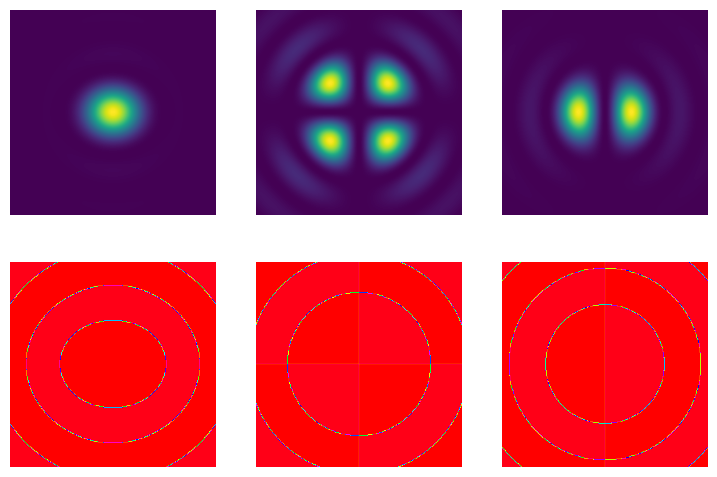

In [5]:
import time 


Ex, Ey, Ez=FocusLG(0,xmax,z,N,NA,n,np.array([0,0]),1)
PlotComponents(Ex,Ey,Ez)

### LG00 linearly polarized in y

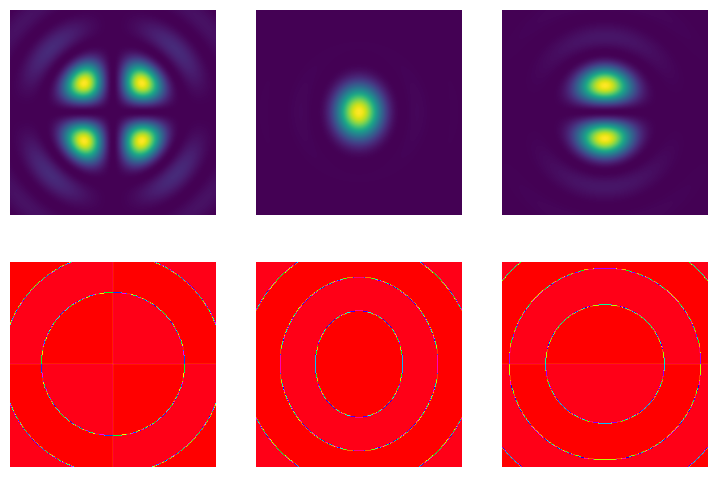

In [7]:
Ex, Ey, Ez=FocusLG(0,xmax,z,N,NA,n,np.array([np.pi/2,0]), 1)
PlotComponents(Ex,Ey,Ez)

### LG00 circularly polarized in L

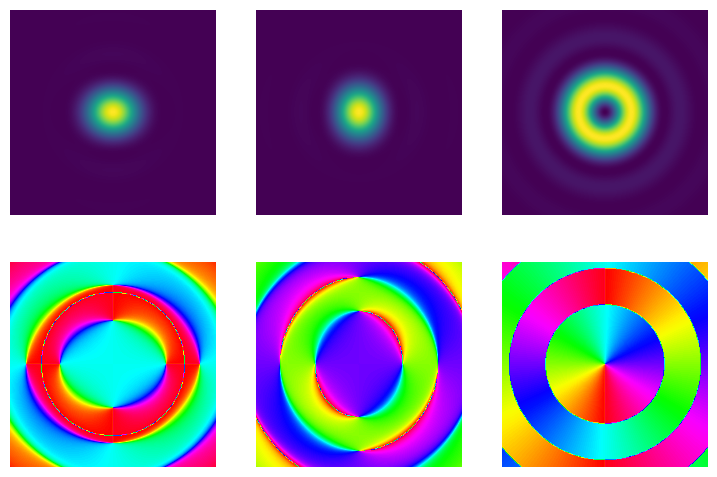

In [8]:
Ex, Ey, Ez=FocusLG(0,xmax,z,N,NA,n,np.array([np.pi/4,np.pi/2]), 1)
PlotComponents(Ex,Ey,Ez)


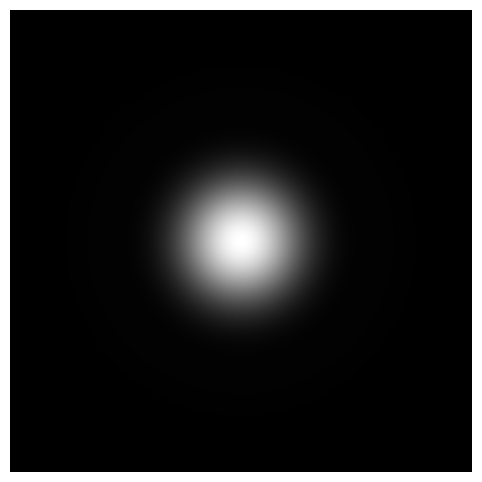

In [9]:
TotInt(Ex,Ey,Ez)

### LG00 circularly polarized in R

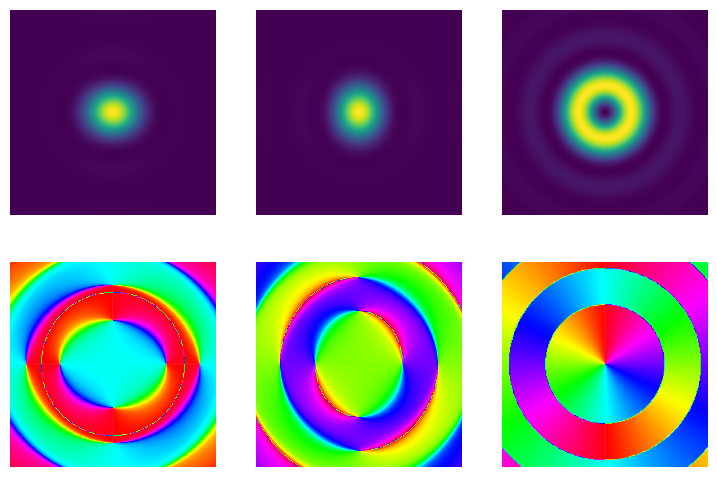

In [10]:
Ex, Ey, Ez=FocusLG(0,xmax,z,N,NA,n,np.array([np.pi/4,-np.pi/2]), 1)
PlotComponents(Ex,Ey,Ez)

### LG01 linearly polarized in x

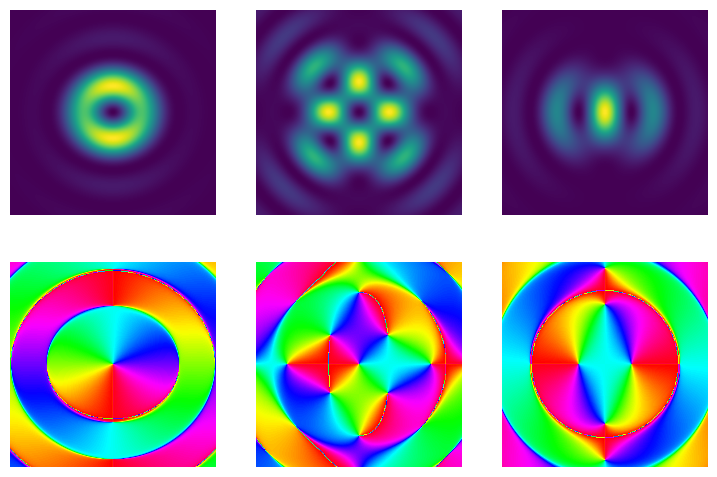

In [11]:
Ex, Ey, Ez=FocusLG(1,xmax,z,N,NA,n,np.array([0,0]),1)
PlotComponents(Ex,Ey,Ez)



### LG01 linearly polarized in y

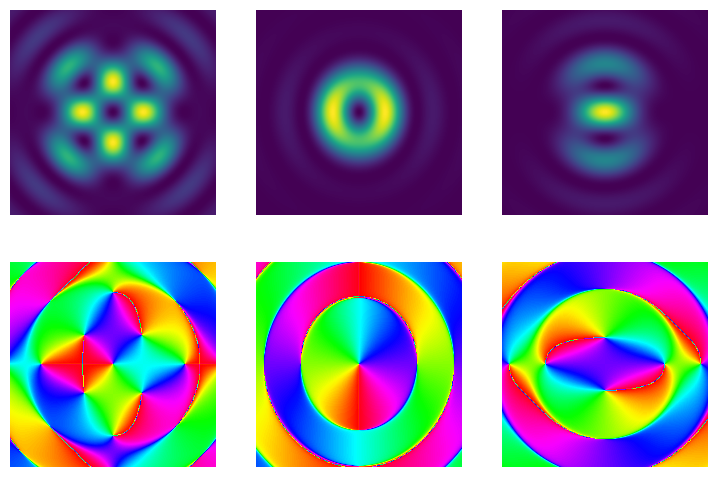

In [12]:
Ex, Ey, Ez=FocusLG(1,xmax,z,N,NA,n,np.array([np.pi/2,0]), 1)
PlotComponents(Ex,Ey,Ez)

### LG01 circularly polarized in L

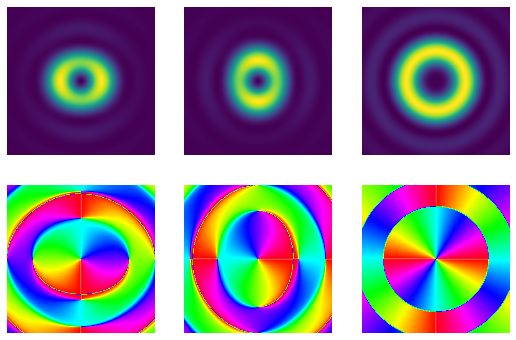

In [ ]:
# Left Polarised Beam
Ex, Ey, Ez=FocusLG(1,xmax,z,N,NA,n,np.array([np.pi/4,np.pi/2]))
PlotComponents(Ex,Ey,Ez)

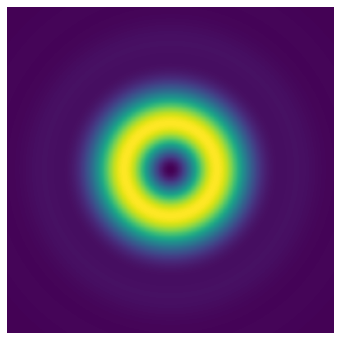

In [ ]:
TotInt(Ex,Ey,Ez)

### LG01 circularly polarized in R

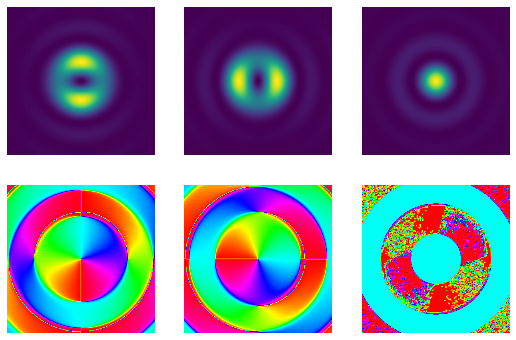

In [ ]:
Ex, Ey, Ez=FocusLG(1,xmax,z,N,NA,n,np.array([np.pi/4,-np.pi/2]))
PlotComponents(Ex,Ey,Ez)

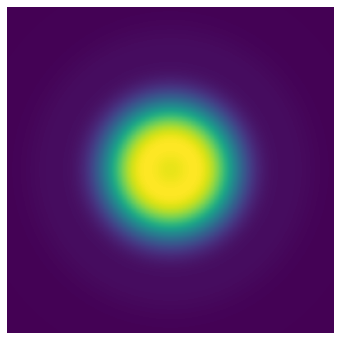

In [ ]:
TotInt(Ex,Ey,Ez)

In [ ]:
def E132z(z,N,xmax):
  Ex1, Ey1, Ez1=FocusLG(-1,xmax,z,N,0.95,1,np.array([np.pi/4,np.pi/2]),1)
  Ex2, Ey2, Ez2=FocusLG(1,xmax,z,N,0.95,1,np.array([np.pi/4,-np.pi/2]),1)

  Ex3, Ey3, Ez3=FocusLG(1,xmax,z,N,0.95,1,np.array([np.pi/4,np.pi/2]),3)
  Ex4, Ey4, Ez4=FocusLG(-1,xmax,z,N,0.95,1,np.array([np.pi/4,-np.pi/2]),3)

  Ex5, Ey5, Ez5=FocusLG(1,xmax,z,N,0.95,1,np.array([np.pi/4,np.pi/2]),2)
  Ex6, Ey6, Ez6=FocusLG(-1,xmax,z,N,0.95,1,np.array([np.pi/4,-np.pi/2]),2)

  Ex= 0.5*(Ex1+Ex2)+Ex3+Ex4+Ex5-Ex6
  Ey= 0.5*(Ey1+Ey2)+Ey3+Ey4+Ey5-Ey6
  Ez= 0.5*(Ez1+Ez2)+Ez3+Ez4+Ez5-Ez6

  return Ex, Ey, Ez

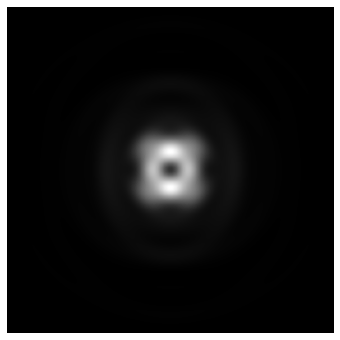

In [ ]:
Ex, Ey, Ez=E132z(0,256,1.5)
TotInt(Ex,Ey,Ez)

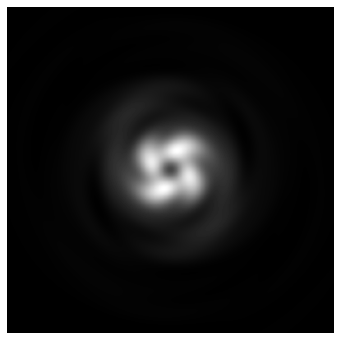

In [ ]:
Ex, Ey, Ez=E132z(0.25,256,1.5)
TotInt(Ex,Ey,Ez)

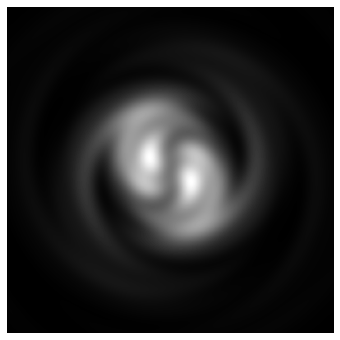

In [ ]:
Ex, Ey, Ez=E132z(0.5,256,1.5)
TotInt(Ex,Ey,Ez)

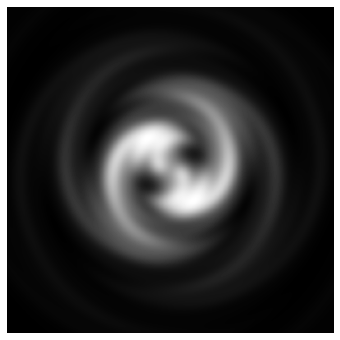

In [ ]:
Ex, Ey, Ez=E132z(0.75,256,2)
TotInt(Ex,Ey,Ez)

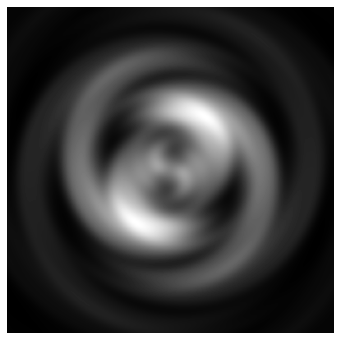

In [ ]:
Ex, Ey, Ez=E132z(1,256,2)
TotInt(Ex,Ey,Ez)

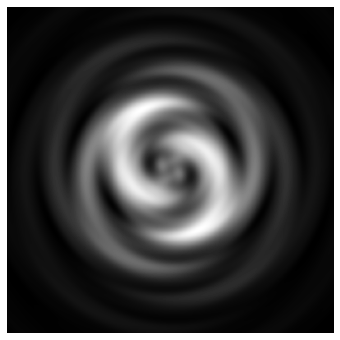

In [ ]:
Ex, Ey, Ez=E132z(1.25,256,3)
TotInt(Ex,Ey,Ez)

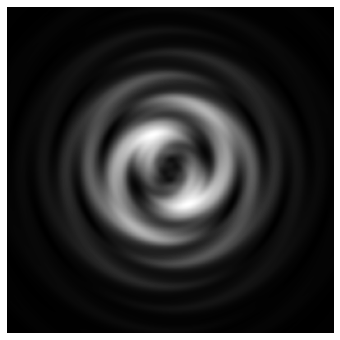

In [ ]:
Ex, Ey, Ez=E132z(1.5,256,4)
TotInt(Ex,Ey,Ez)

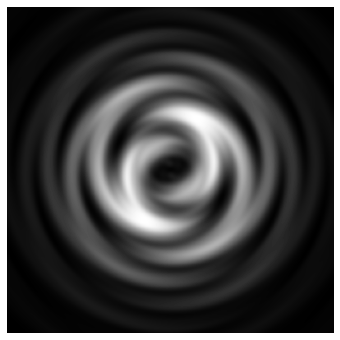

In [ ]:
Ex, Ey, Ez=E132z(1.75,256,4)
TotInt(Ex,Ey,Ez)

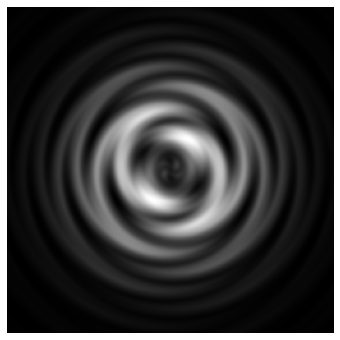

In [ ]:
Ex, Ey, Ez=E132z(2,256,5)
TotInt(Ex,Ey,Ez)